In [64]:
import flirt.with_
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix,precision_score,recall_score,accuracy_score

In [65]:
zip_file_path = "./Empatica/1659768236_A04B39.zip"
df = flirt.with_.empatica(zip_file_path,
                            window_length = 10,
                            window_step_size = 10,
                            hrv_features = True,
                            eda_features = True,
                            acc_features = True)
data = df
data.head(10)

EDA features: 100%|████████████████████████████| 93/93 [00:00<00:00, 820.83it/s]
/tmp/ipykernel_27176/3071368833.py:2: UserWarning: phasic_entropy contains more than 5% (actual: 58.06%) nan, inf, or -inf values. We recommend to delete this feature column.
  df = flirt.with_.empatica(zip_file_path,
ACC features: 100%|████████████████████████████| 94/94 [00:00<00:00, 623.95it/s]


,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,...,acc_l2_n_above_mean,acc_l2_n_below_mean,acc_l2_n_sign_changes,acc_l2_iqr,acc_l2_iqr_5_95,acc_l2_pct_5,acc_l2_pct_95,acc_l2_entropy,acc_l2_perm_entropy,acc_l2_svd_entropy
2022-08-06 06:44:06+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.0,213.0,0.0,3.931986,32.452277,50.071798,82.524075,5.755582,0.998384,0.430579
2022-08-06 06:44:16+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.0,174.0,0.0,9.938644,34.967775,48.522018,83.489793,5.751492,0.997924,0.502343
2022-08-06 06:44:26+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,241.0,0.0,3.554148,31.154139,54.434703,85.588842,5.755983,0.996832,0.434178
2022-08-06 06:44:36+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.0,192.0,0.0,2.489876,16.650683,55.206359,71.857042,5.760399,0.997924,0.369637
2022-08-06 06:44:46+00:00,7.0,681.328125,679.687500,91.40625,26.729747,28.613740,0.950000,9.500000,3.900000,40.0,...,145.0,175.0,0.0,4.635753,20.305851,55.538696,75.844547,5.763423,0.999993,0.299042
2022-08-06 06:44:56+00:00,0.0,655.546875,653.645833,83.59375,27.304261,28.902151,0.783333,7.833333,3.566667,40.0,...,139.0,181.0,0.0,5.830603,28.634535,50.977416,79.611950,5.757937,0.999131,0.418870
2022-08-06 06:45:06+00:00,0.0,629.765625,627.604167,75.78125,27.878775,29.190562,0.616667,6.166667,3.233333,40.0,...,172.0,148.0,0.0,3.664132,9.531143,58.875712,68.406854,5.767263,0.997924,0.200483
2022-08-06 06:45:16+00:00,0.0,603.984375,601.562500,67.96875,28.453289,29.478973,0.450000,4.500000,2.900000,40.0,...,138.0,182.0,0.0,4.797168,22.418507,54.662587,77.081094,5.761759,0.999993,0.342026
2022-08-06 06:45:26+00:00,0.0,578.203125,575.520833,60.15625,29.027802,29.767384,0.283333,2.833333,2.566667,40.0,...,162.0,158.0,0.0,5.360243,21.801564,53.087656,74.889219,5.762935,0.999993,0.307233
2022-08-06 06:45:36+00:00,1.5,552.421875,549.479167,52.34375,29.602316,30.055795,0.116667,1.166667,2.233333,40.0,...,162.0,158.0,0.0,3.186067,8.774102,59.613756,68.387858,5.767399,0.997924,0.183715


In [66]:
df.iloc[18]

num_ibis                 0.300000
hrv_mean_nni           524.914062
hrv_median_nni         520.468750
hrv_range_nni           70.937500
hrv_sdsd                49.235660
                          ...    
acc_l2_pct_5            54.591658
acc_l2_pct_95           74.327992
acc_l2_entropy           5.762171
acc_l2_perm_entropy      0.999418
acc_l2_svd_entropy       0.352244
Name: 2022-08-06 06:47:06+00:00, Length: 178, dtype: float64

In [67]:
list(data)

['num_ibis',
 'hrv_mean_nni',
 'hrv_median_nni',
 'hrv_range_nni',
 'hrv_sdsd',
 'hrv_rmssd',
 'hrv_nni_50',
 'hrv_pnni_50',
 'hrv_nni_20',
 'hrv_pnni_20',
 'hrv_cvsd',
 'hrv_sdnn',
 'hrv_cvnni',
 'hrv_mean_hr',
 'hrv_min_hr',
 'hrv_max_hr',
 'hrv_std_hr',
 'hrv_total_power',
 'hrv_vlf',
 'hrv_lf',
 'hrv_hf',
 'hrv_lf_hf_ratio',
 'hrv_lfnu',
 'hrv_hfnu',
 'hrv_mean',
 'hrv_std',
 'hrv_min',
 'hrv_max',
 'hrv_ptp',
 'hrv_sum',
 'hrv_energy',
 'hrv_skewness',
 'hrv_kurtosis',
 'hrv_peaks',
 'hrv_rms',
 'hrv_lineintegral',
 'hrv_n_above_mean',
 'hrv_n_below_mean',
 'hrv_n_sign_changes',
 'hrv_iqr',
 'hrv_iqr_5_95',
 'hrv_pct_5',
 'hrv_pct_95',
 'hrv_entropy',
 'hrv_perm_entropy',
 'hrv_svd_entropy',
 'eda_tonic_mean',
 'eda_tonic_std',
 'eda_tonic_min',
 'eda_tonic_max',
 'eda_tonic_ptp',
 'eda_tonic_sum',
 'eda_tonic_energy',
 'eda_tonic_skewness',
 'eda_tonic_kurtosis',
 'eda_tonic_peaks',
 'eda_tonic_rms',
 'eda_tonic_lineintegral',
 'eda_tonic_n_above_mean',
 'eda_tonic_n_below_mean',

In [68]:
data = df

In [69]:
# data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
# data.shape

data = data.dropna(axis=0)

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data = data.dropna(axis=1)
data.shape


/tmp/ipykernel_27176/197174417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)


(90, 173)

In [70]:
data.tail(10)

,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,...,acc_l2_n_above_mean,acc_l2_n_below_mean,acc_l2_n_sign_changes,acc_l2_iqr,acc_l2_iqr_5_95,acc_l2_pct_5,acc_l2_pct_95,acc_l2_entropy,acc_l2_perm_entropy,acc_l2_svd_entropy
2022-08-06 06:58:06+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,159.0,161.0,0.0,4.000964,21.535537,52.510945,74.046483,5.761172,0.998384,0.357764
2022-08-06 06:58:16+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,102.0,218.0,0.0,5.414261,42.645882,47.321612,89.967494,5.751152,0.995509,0.431425
2022-08-06 06:58:26+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,103.0,217.0,0.0,3.364409,24.119714,54.991598,79.111312,5.761728,0.999648,0.360156
2022-08-06 06:58:36+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,144.0,176.0,0.0,10.192748,41.701215,45.751487,87.452702,5.752390,0.999993,0.433614
2022-08-06 06:58:46+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,144.0,176.0,0.0,6.617549,34.516930,47.894466,82.411396,5.753439,0.998384,0.477925
2022-08-06 06:58:56+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,133.0,187.0,0.0,7.559281,24.786864,53.908708,78.695572,5.759050,0.999648,0.429850
2022-08-06 06:59:06+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,127.0,193.0,0.0,6.134297,23.628419,54.560038,78.188456,5.760524,0.999648,0.410641
2022-08-06 06:59:16+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,163.0,157.0,0.0,5.611009,15.894786,54.845222,70.740008,5.765122,0.997924,0.309258
2022-08-06 06:59:26+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,126.0,194.0,0.0,3.052436,12.622347,57.642865,70.265212,5.765419,0.999821,0.296154
2022-08-06 06:59:36+00:00,0.0,492.1875,484.375,31.25,20.728905,20.963137,0.0,0.0,2.0,33.333333,...,12.0,12.0,0.0,1.098777,5.712335,60.632671,66.345006,3.177590,0.998364,0.138398


In [71]:
list(data[data == -np.inf].count())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [72]:
list(data)

['num_ibis',
 'hrv_mean_nni',
 'hrv_median_nni',
 'hrv_range_nni',
 'hrv_sdsd',
 'hrv_rmssd',
 'hrv_nni_50',
 'hrv_pnni_50',
 'hrv_nni_20',
 'hrv_pnni_20',
 'hrv_cvsd',
 'hrv_sdnn',
 'hrv_cvnni',
 'hrv_mean_hr',
 'hrv_min_hr',
 'hrv_max_hr',
 'hrv_std_hr',
 'hrv_total_power',
 'hrv_vlf',
 'hrv_lf',
 'hrv_hf',
 'hrv_lf_hf_ratio',
 'hrv_lfnu',
 'hrv_hfnu',
 'hrv_mean',
 'hrv_std',
 'hrv_min',
 'hrv_max',
 'hrv_ptp',
 'hrv_sum',
 'hrv_energy',
 'hrv_skewness',
 'hrv_kurtosis',
 'hrv_peaks',
 'hrv_rms',
 'hrv_lineintegral',
 'hrv_n_above_mean',
 'hrv_n_below_mean',
 'hrv_n_sign_changes',
 'hrv_iqr',
 'hrv_iqr_5_95',
 'hrv_pct_5',
 'hrv_pct_95',
 'hrv_entropy',
 'hrv_perm_entropy',
 'hrv_svd_entropy',
 'eda_tonic_mean',
 'eda_tonic_std',
 'eda_tonic_min',
 'eda_tonic_max',
 'eda_tonic_ptp',
 'eda_tonic_sum',
 'eda_tonic_energy',
 'eda_tonic_skewness',
 'eda_tonic_kurtosis',
 'eda_tonic_peaks',
 'eda_tonic_rms',
 'eda_tonic_lineintegral',
 'eda_tonic_n_above_mean',
 'eda_tonic_n_below_mean',

In [73]:
# Normalization
# scale = StandardScaler()
# data = scale.fit_transform(data)

In [74]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)

In [75]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','22'])

In [76]:
pca.explained_variance_ratio_.cumsum()

array([0.61613932, 0.83166445, 0.9684359 ])

In [77]:
principalDf.head(10)

,principal component 1,principal component 2,22
0,2.824483e+06,508573.171883,-182027.957441
1,2.172562e+06,997819.590312,-22611.059118
2,1.634323e+06,836820.554418,-2658.601052
3,1.179532e+06,244092.810610,-180862.161127
4,6.173505e+05,272415.811026,-260369.559503
5,-2.411083e+04,690473.492289,-92772.394676
6,-4.482844e+05,617553.301535,-123447.412635
7,-5.284439e+05,637703.613745,-128070.365572
8,-4.617009e+05,629640.770953,-124231.362415
9,-5.027038e+05,624941.912070,-168748.879519


Text(0, 0.5, 'Principal Component 2')

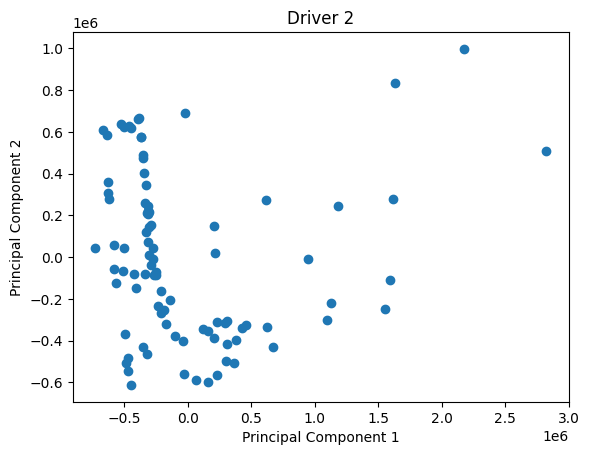

In [78]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.title("Driver 2") #title
plt.xlabel("Principal Component 1") #x label
plt.ylabel("Principal Component 2") #y label

In [79]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [80]:
y_km = km.fit_predict(principalDf)
y_km

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

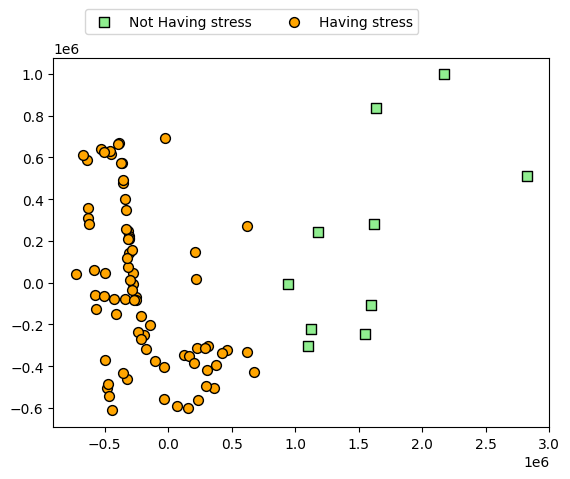

In [81]:
plt.scatter(
    principalDf[y_km == 0]['principal component 1'], principalDf[y_km == 0]['principal component 2'],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Not Having stress'
)

plt.scatter(
    principalDf[y_km == 1]['principal component 1'], principalDf[y_km == 1]['principal component 2'],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Having stress'
)
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)

In [82]:
set(df)-set(data)
# y_km[13:13+54]

{'acc_acc_x_entropy',
 'acc_acc_y_entropy',
 'acc_acc_z_entropy',
 'eda_phasic_entropy',
 'eda_tonic_entropy'}

In [83]:
d3 = np.array([0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
y = y_km[13:13+54]
precision_recall_fscore_support(d3,y)
# y_km

(array([0.33333333, 0.0625    ]),
 array([0.04255319, 0.42857143]),
 array([0.0754717 , 0.10909091]),
 array([47,  7]))

In [84]:
accuracy_score(d3,y)

0.09259259259259259

In [85]:
# d4 = np.array([0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1])
# y = y_km[16:16+42]
# precision_recall_fscore_support(d4,y)

In [86]:
# accuracy_score(d4,y)

In [87]:
cf_matrix = confusion_matrix(d3, y)
print(cf_matrix)

[[ 2 45]
 [ 4  3]]


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

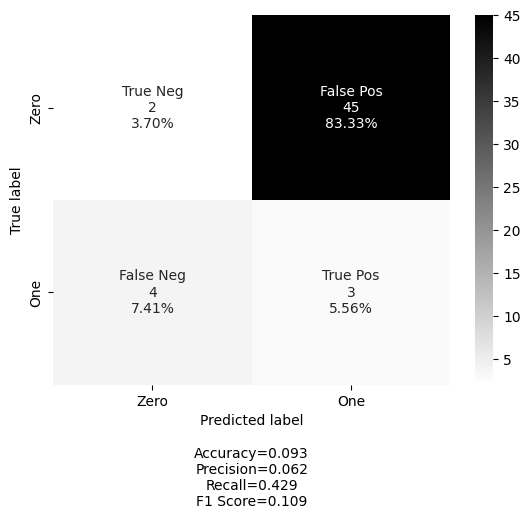

In [89]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')